In [23]:
import pandas as pd

data = pd.read_csv("nonnull_data.csv")

In [24]:
data.head()

,Unnamed: 0,ID,year,loan_amount,term,property_value,income,Credit_Score,LTV,Status,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,24890,2019,116500,360.0,118000.0,1740.0,758,98.728814,1,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,1,24891,2019,206500,360.0,418000.0,4980.0,552,75.135870,1,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,2,24892,2019,406500,360.0,508000.0,9480.0,834,80.019685,0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,3,24893,2019,456500,360.0,658000.0,11880.0,587,69.376900,0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,4,24894,2019,696500,360.0,758000.0,10440.0,602,91.886544,0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [25]:
data.columns

Index(['Unnamed: 0', 'ID', 'year', 'loan_amount', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'Status', 'dtir1', 'loan_limit',
       'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [26]:
# we dont need below columns because they do not contrivute to output variable and have very low standard deviation
drop_cols = ['Unnamed: 0', 'ID', 'year', 'Security_Type','LTV']

data.drop(columns=drop_cols, inplace=True)

In [27]:
data.columns

Index(['loan_amount', 'term', 'property_value', 'income', 'Credit_Score',
       'Status', 'dtir1', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region'],
      dtype='object')

In [28]:
data.head()

,loan_amount,term,property_value,income,Credit_Score,Status,dtir1,loan_limit,Gender,approv_in_adv,...,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region
0,116500,360.0,118000.0,1740.0,758,1,45.0,cf,Sex Not Available,nopre,...,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south
1,206500,360.0,418000.0,4980.0,552,1,39.0,cf,Male,nopre,...,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North
2,406500,360.0,508000.0,9480.0,834,0,46.0,cf,Male,pre,...,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south
3,456500,360.0,658000.0,11880.0,587,0,42.0,cf,Male,nopre,...,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North
4,696500,360.0,758000.0,10440.0,602,0,39.0,cf,Joint,pre,...,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North


[66.22096003 76.7390476  91.23401496 ... 93.43793979 75.76778563
 91.23401496]
Lambda: 0.2434926897267231


C:\Users\naman\AppData\Local\Temp\ipykernel_12716\1717295192.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, kde=True)


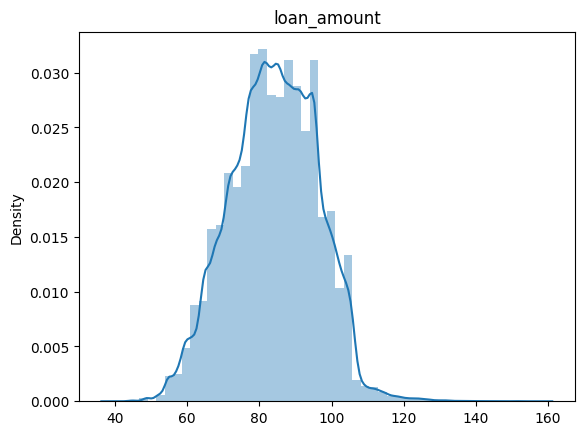

In [29]:
# Lets start feature transformation

# 1. Lets start with loan_amount
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(data['loan_amount'])

print(transformed_data)
print('Lambda:', lambda_value)

sns.distplot(transformed_data, kde=True)
plt.title('loan_amount')  # Set the title of the plot to the column name
plt.show()

In [30]:
# term column contains only 26 unique values so we will convert it to the categotcial column
# Convert the numeric column to categorical
data['term'] = data['term'].astype('object')

[14.03583347 15.87890586 16.16945748 ... 16.71016096 15.27676358
 16.30995477]
Lambda: 0.030579570108208887


C:\Users\naman\AppData\Local\Temp\ipykernel_12716\1608037595.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data_property_val, kde=True)


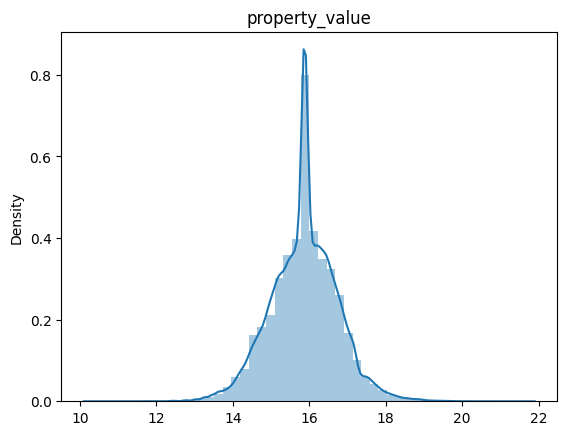

In [31]:
# Apply Box-Cox transformation
transformed_data_property_val, lambda_value = stats.boxcox(data['property_value'])

print(transformed_data_property_val)
print('Lambda:', lambda_value)

sns.distplot(transformed_data_property_val, kde=True)
plt.title('property_value')  # Set the title of the plot to the column name
plt.show()

[35.24213629 51.95360241 65.61942256 ... 58.49621347 59.22590199
 59.58473677]
Lambda: 0.34558606946323084


C:\Users\naman\AppData\Local\Temp\ipykernel_12716\2939008175.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data_income, kde=True)


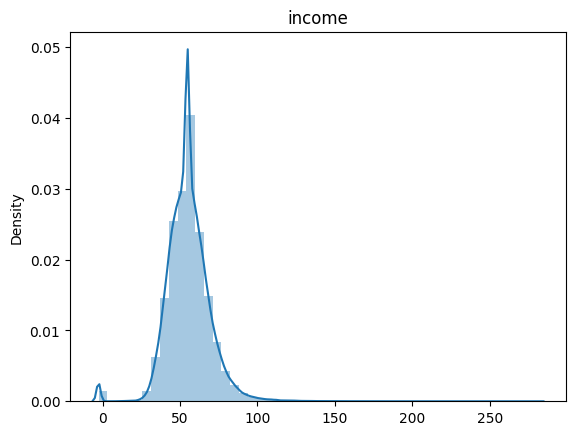

In [32]:
# Apply Box-Cox transformation
# Add a constant value
constant = 0.001
transformed_data_income, lambda_value = stats.boxcox(data['income'] + constant)

print(transformed_data_income)
print('Lambda:', lambda_value)


sns.distplot(transformed_data_income, kde=True)
plt.title('income')  # Set the title of the plot to the column name
plt.show()

C:\Users\naman\AppData\Local\Temp\ipykernel_12716\1569780440.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data_credit_Score, kde=True)


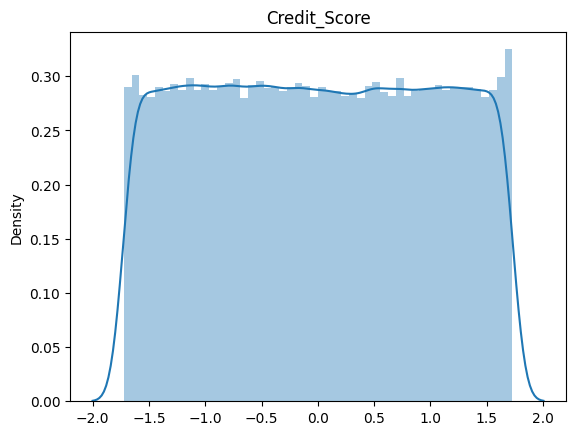

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the variable
transformed_data_credit_Score = scaler.fit_transform(data[['Credit_Score']])
sns.distplot(transformed_data_credit_Score, kde=True)
plt.title('Credit_Score')  # Set the title of the plot to the column name
plt.show()

[273.57700229 217.53207829 283.37763303 ... 313.54441885 135.26385734
 263.9057229 ]
Lambda: 1.597855010676073


C:\Users\naman\AppData\Local\Temp\ipykernel_12716\1252213872.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data_dtir1, kde=True)


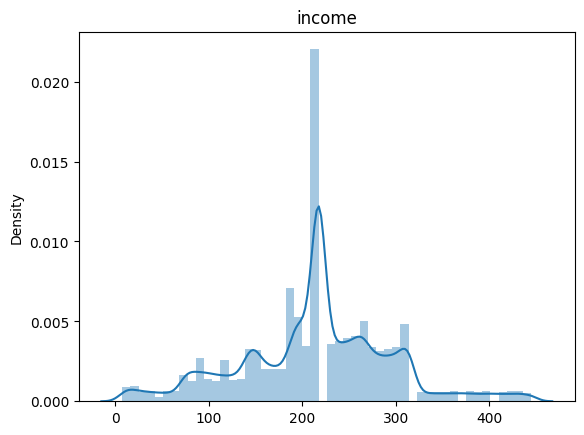

In [34]:
constant = 0.001
transformed_data_dtir1, lambda_value = stats.boxcox(data['dtir1'] + constant)

print(transformed_data_dtir1)
print('Lambda:', lambda_value)


sns.distplot(transformed_data_dtir1, kde=True)
plt.title('income')  # Set the title of the plot to the column name
plt.show()

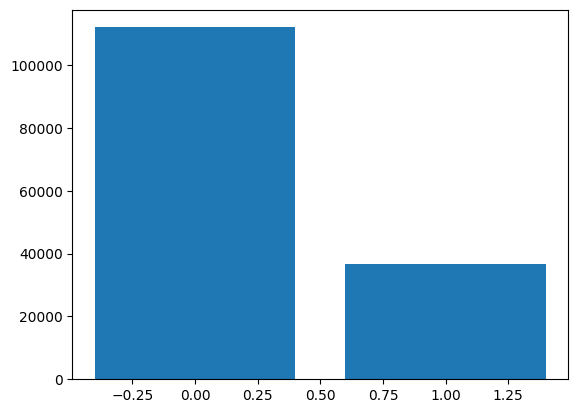

In [35]:
# now lets handle categorical column
status_counts = data['Status'].value_counts()

plt.bar(status_counts.index, status_counts.values)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categoical_cols = data.select_dtypes(include='object')
for col in categoical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [57]:
data['loan_amount'] = pd.Series(transformed_data)
data['property_value'] = pd.Series(transformed_data_property_val)
data['income'] = pd.Series(transformed_data_income)
data['Credit_Score'] = pd.Series(transformed_data_credit_Score.reshape(-1))
data['dtir1'] = pd.Series(transformed_data_dtir1)

In [58]:
from imblearn.over_sampling import ADASYN
import pandas as pd



# Separate features and labels
X = data.drop('Status', axis=1)
y = data['Status']

# Create ADASYN sampler
adasyn_sampler = ADASYN(random_state=42)

# Apply ADASYN sampling
X_resampled, y_resampled = adasyn_sampler.fit_resample(X, y)

print("Original Data:")
print(X)
print(y)
print("Resampled Data:")
print(X_resampled)
print(y_resampled)

Original Data:
        loan_amount  term  property_value     income  Credit_Score  \
0         66.220960    25       14.035833  35.242136      0.502357   
1         76.739048    25       15.878906  51.953602     -1.275413   
2         91.234015    25       16.169457  65.619423      1.158234   
3         93.965439    25       16.557642  71.176576     -0.973365   
4        104.591376    25       16.771216  67.941821     -0.843916   
...             ...   ...             ...        ...           ...   
148665    92.901426     8       16.438740  61.323002     -0.352008   
148666   100.135684    25       16.829972  59.225902     -1.128704   
148667    93.437940     8       16.710161  58.496213      0.019080   
148668    75.767786     8       15.276764  59.225902      0.321128   
148669    91.234015    13       16.309955  59.584737      1.123714   

             dtir1  loan_limit  Gender  approv_in_adv  loan_type  ...  \
0       273.577002           0       3              0          0  ...  

In [59]:
X_resampled.shape

(232050, 26)

In [60]:
y_resampled.shape

(232050,)

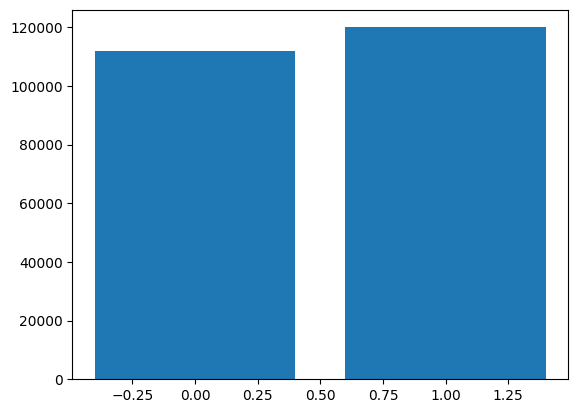

In [61]:
sampled_df = pd.concat([X_resampled, y_resampled], axis=1)
# now lets handle categorical column
status_counts = sampled_df['Status'].value_counts()

plt.bar(status_counts.index, status_counts.values)
plt.show()

In [64]:
# Lets create a final dataframe after performing all the transformations
final_df = pd.concat([X_resampled, y_resampled], axis=1)
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232050 entries, 0 to 232049
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                232050 non-null  float64
 1   term                       232050 non-null  int32  
 2   property_value             232050 non-null  float64
 3   income                     232050 non-null  float64
 4   Credit_Score               232050 non-null  float64
 5   dtir1                      232050 non-null  float64
 6   loan_limit                 232050 non-null  int32  
 7   Gender                     232050 non-null  int32  
 8   approv_in_adv              232050 non-null  int32  
 9   loan_type                  232050 non-null  int32  
 10  loan_purpose               232050 non-null  int32  
 11  Credit_Worthiness          232050 non-null  int32  
 12  open_credit                232050 non-null  int32  
 13  business_or_commercial     23

In [65]:
# now we have done all the transformations necessary to train a ml model lets save this dataframe
final_df.to_csv("final.csv")